### This Notebook is an attempt to create a GUI through Python.
**I am going to be sincere and say that this work is all sweat and tears from Chat GPT**

In [1]:
## ideas to incorporate!
## ctrl z button
## a next button: you load a file with a number of profiles in it and then you can flick through them one by one 


In [2]:
#pip install mpldatacursor

In [12]:
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import mplcursors  # Import mplcursors


ModuleNotFoundError: No module named 'mplcursors'

In [4]:
# Generate dummy data for temperature profiles
num_profiles = 2
depth = np.arange(0, 1000, 10)  # Depth in meters
temperature_profiles = []
for _ in range(num_profiles):
    temperature = np.random.uniform(2, 20, len(depth))  # Temperature in °C
    temperature_profiles.append((depth, temperature))


Recorded Depths: [596.567880794702, 591.5596026490066]


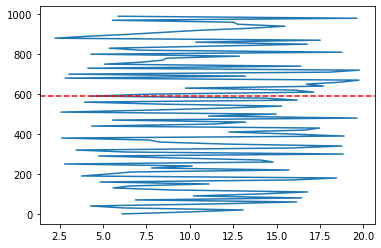

In [6]:
class OceanProfileGUI:
    def __init__(self, root, temperature_profiles):
        self.root = root
        self.root.title("Ocean Profile Analysis")

        self.temperature_profiles = temperature_profiles
        self.num_profiles = len(temperature_profiles)
        self.current_profile_index = 0  # Index of the currently displayed profile

        self.canvas = plt.figure(figsize=(6, 4))
        self.plot_area = self.canvas.add_subplot(111)
        self.plot_area.set_xlabel("Temperature (°C)")
        self.plot_area.set_ylabel("Depth (m)")
        self.plot_area.invert_yaxis()  # Invert the y-axis

        self.canvas_widget = FigureCanvasTkAgg(self.canvas, master=root)
        self.canvas_widget.get_tk_widget().pack()

        self.selected_depth = None
        self.recorded_depths = []  # List to store recorded depths

        self.load_profile()  # Load first profile initially
        self.next_button = tk.Button(root, text="Next", command=self.load_next_profile)
        self.next_button.pack()

        self.profile_label = tk.Label(root, text=f"{self.current_profile_index + 1}/{self.num_profiles}")
        self.profile_label.place(x=10, y=10)  # Position the label on the top-left corner

        self.canvas_widget.mpl_connect('button_press_event', self.on_click)

    def load_profile(self):
        # Plot the current profile
        self.plot_area.clear()
        depth, temperature = self.temperature_profiles[self.current_profile_index]
        self.plot_area.plot(temperature, depth)
        self.canvas_widget.draw()

    def load_next_profile(self):
        # Load and plot the next profile if not all profiles have been displayed
        if self.current_profile_index < self.num_profiles - 1:
            self.current_profile_index += 1
            self.load_profile()
            # Update the profile label
            self.profile_label.config(text=f"{self.current_profile_index + 1}/{self.num_profiles}")
        else:
            # Close the GUI if all profiles have been displayed
            self.root.quit()
            self.root.destroy()

    def on_click(self, event):
        # Get depth where user clicked
        depth = event.ydata
        # Record selected depth
        self.selected_depth = depth
        self.recorded_depths.append(depth)  # Record depth
        # Mark selected depth on the plot
        self.plot_area.axhline(depth, color='r', linestyle='--')
        self.canvas_widget.draw()

# Assuming temperature_profiles is the variable containing the loaded profiles

# Create the GUI
root = tk.Tk()
gui = OceanProfileGUI(root, temperature_profiles)
root.mainloop()

# Output recorded depths
print("Recorded Depths:", gui.recorded_depths)

Recorded Depths: []


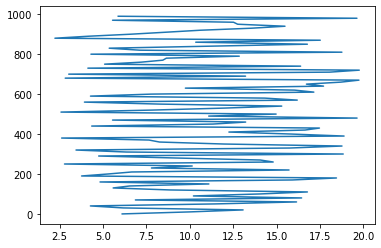

In [14]:
class OceanProfileGUI:
    def __init__(self, root, temperature_profiles):
        self.root = root
        self.root.title("Ocean Profile Analysis")

        self.temperature_profiles = temperature_profiles
        self.num_profiles = len(temperature_profiles)
        self.current_profile_index = 0  # Index of the currently displayed profile

        self.canvas = plt.figure(figsize=(6, 4))
        self.plot_area = self.canvas.add_subplot(111)
        self.plot_area.set_xlabel("Temperature (°C)")
        self.plot_area.set_ylabel("Depth (m)")
        depth, temperature = temperature_profiles[self.current_profile_index]
        self.plot_area.plot(temperature, depth)
        self.canvas_widget = FigureCanvasTkAgg(self.canvas, master=root)
        self.canvas_widget.get_tk_widget().pack(side=tk.LEFT)

        self.selected_depth = None
        self.recorded_depths = []  # List to store recorded depths

        # Create a side box to display profile index and depth
        self.side_box = tk.Text(root, height=10, width=20)
        self.side_box.pack(side=tk.RIGHT)

        self.update_side_box()  # Update the side box with current profile index and depth

        # Connect event handler to display depth as you hover over the profile
        self.canvas_widget.mpl_connect('motion_notify_event', self.on_hover_profile)

        self.next_button = tk.Button(root, text="Next", command=self.load_next_profile)
        self.next_button.pack()

    def load_next_profile(self):
        # Load and plot the next profile if not all profiles have been displayed
        if self.current_profile_index < self.num_profiles - 1:
            self.current_profile_index += 1
            self.plot_area.clear()
            depth, temperature = self.temperature_profiles[self.current_profile_index]
            self.plot_area.plot(temperature, depth)
            self.update_side_box()  # Update the side box with current profile index and depth
            self.canvas_widget.draw()
        else:
            # Close the GUI if all profiles have been displayed
            self.root.quit()
            self.root.destroy()

    def on_hover_profile(self, event):
        # Display depth in side box as you hover over the profile
        if event.xdata is not None and event.ydata is not None:
            depth = event.ydata
            self.side_box.delete(1.0, tk.END)  # Clear previous content
            self.side_box.insert(tk.END, f"Depth: {depth:.2f} m")

    def update_side_box(self):
        # Update the side box with current profile index
        self.side_box.delete(1.0, tk.END)  # Clear previous content
        self.side_box.insert(tk.END, f"Profile: {self.current_profile_index + 1}/{self.num_profiles}\n")

if __name__ == "__main__":
    # Assuming temperature_profiles is the variable containing the loaded profiles

    # Create the GUI
    root = tk.Tk()
    gui = OceanProfileGUI(root, temperature_profiles)
    root.mainloop()

    # Output recorded depths
    print("Recorded Depths:", gui.recorded_depths)